In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
expr_df = pd.read_csv('cel_files/named_merged_normalized_expression_data.csv', index_col=0).T
typ = []
design_arr = []

for x in expr_df.index[:-1]:
    if 'N' in x or 'P' in x:
        typ.append('Normal')
        design_arr.append([1, 0])
    else:
        typ.append('Breast Cancer')
        design_arr.append([0, 1])
typ.append(None)
#expr_df['Group'] = typ

expr_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM1045191_N1_15_12_04.CEL,7.944225,5.256938,4.93463,6.608426,2.48429,7.019424,6.89269,4.08288,6.143621,2.844191,...,12.679336,12.318159,13.79956,13.587273,9.363057,6.057322,7.563571,2.368188,2.652841,2.833601
GSM1045192_N4_14_12_04.CEL,7.083198,5.212302,5.432387,7.43457,3.690648,6.876868,6.001216,3.934102,6.247885,3.559146,...,13.449719,13.214004,14.071025,13.901416,13.218539,10.466859,12.086706,2.39458,3.255559,3.228153
GSM1045193_N5_15_12_04.CEL,6.740806,4.995208,4.693723,7.226626,2.889619,7.620803,5.515974,3.832815,4.720125,3.029119,...,13.294739,13.04888,14.034971,13.856568,12.872773,10.296793,11.958823,2.41884,3.278727,2.767945
GSM1045194_N6_14_12_04.CEL,8.884037,5.331575,4.904832,7.204006,2.749701,6.972236,6.070183,3.701337,4.895399,3.039838,...,13.634795,13.481412,14.218437,14.140858,11.468037,7.779574,9.760999,2.58049,2.857335,3.066533
GSM1045195_P1_15_12_04.CEL,7.567701,5.346073,5.065426,6.974676,2.621078,7.225207,7.068959,4.021849,5.29137,2.852843,...,13.038809,12.717493,13.985694,13.816163,9.887965,6.594833,7.974958,2.331745,2.79902,3.011013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1045308_T97_3_12_04.CEL,9.200912,5.177657,4.61814,6.327677,2.46349,6.821004,5.709384,3.656983,4.798115,3.947731,...,12.696856,12.407032,13.861499,13.638063,9.16122,4.813848,6.9992,2.585284,2.572086,2.927002
GSM1045309_T98_22_12_04.CEL,8.67541,5.784583,5.349351,7.107116,2.525008,7.589807,5.724006,3.657753,4.365179,3.217924,...,12.692024,12.316381,13.692009,13.521965,9.352961,4.681047,7.055527,2.494807,2.986089,3.062063
GSM1045310_T99_20_12_04.CEL,10.027844,5.85311,4.904169,6.593784,2.67205,6.925438,6.12879,3.593575,4.340948,2.936946,...,11.822191,11.34347,13.100664,12.862788,8.922177,4.858633,6.898066,2.448368,2.672017,2.717255
GSM1045311_T9A_9_12_04.CEL,9.295468,5.581375,4.990976,6.550836,2.544604,7.312683,6.772506,3.487454,6.096221,2.831638,...,12.948093,12.659523,13.942934,13.707323,8.38375,5.105472,6.512371,2.471677,2.650102,3.061223


In [3]:
expr_df.T.Gene_Symbol.value_counts()

Gene_Symbol
YME1L1          26
IGKC            19
IGHG1           15
HFE             15
NRP2            14
                ..
MSH2             1
LINC00305        1
OSTCP1           1
BTAF1            1
LOC100505915     1
Name: count, Length: 20962, dtype: int64

In [4]:
array_gene_map = expr_df.T['Gene_Symbol'].to_dict()


In [25]:
%pip install pydeseq2

  Using cached pydeseq2-0.4.4-py3-none-any.whl (42 kB)
     |████████████████████████████████| 12.4 MB 2.2 MB/s eta 0:00:01
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
     |████████████████████████████████| 11.1 MB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 17.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 38.2 MB/s eta 0:00:01     |████████████████████████████████| 17.3 MB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 30.5 MB/s eta 0:00:01    |███████████████████████████▍    | 9.3 MB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 29.0 MB/s eta 0:00:01
     |████████████████

In [19]:
%pip install goatools

     |████████████████████████████████| 15.8 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 4.7 MB/s eta 0:00:011
     |████████████████████████████████| 1.2 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 4.8 MB/s eta 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=ea12885e2cc7ab0e837dbaccfa1193bbd7cb424f754ce54f486529dac0e056f1
  Stored in directory: /home/alarsen/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.7.2
    Uninstalling Pygments-2.7.2:
      Successfully uninstalled Pygments-2.7.2
  Attempting uninstall: pyparsing
    Found existing installation: p

In [5]:
limma_df = pd.read_csv('cel_files/limma_calculated_breast_cancer_expression_data.csv', index_col=0)
limma_df['Gene_Symbol'] = limma_df.index.map(array_gene_map)

limma_df

,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene_Symbol
237351_at,-3.529673,3.781575,-22.288216,9.192556e-45,5.026030e-40,91.115768,LINC01697
232313_at,-2.881126,5.439432,-20.647133,1.460357e-41,3.343831e-37,83.895202,TMEM132C
206069_s_at,-2.855783,3.825088,-20.554504,2.235849e-41,3.343831e-37,83.477321,ACADL
89977_at,-3.172553,4.638687,-20.534968,2.446332e-41,3.343831e-37,83.389046,ACSM5
219059_s_at,-3.331475,4.348088,-19.858079,5.690902e-40,6.223001e-36,80.299708,LYVE1
...,...,...,...,...,...,...,...
216944_s_at,0.000027,4.347723,0.000171,9.998639e-01,9.999264e-01,-7.187323,ITPR1
227159_at,-0.000020,5.418592,-0.000127,9.998988e-01,9.999264e-01,-7.187323,GHDC
1566265_at,-0.000006,2.924527,-0.000125,9.999008e-01,9.999264e-01,-7.187323,NaN
206982_at,-0.000010,2.907579,-0.000109,9.999132e-01,9.999264e-01,-7.187323,CRYBA1


<Axes: xlabel='logFC', ylabel='Gene_Symbol'>

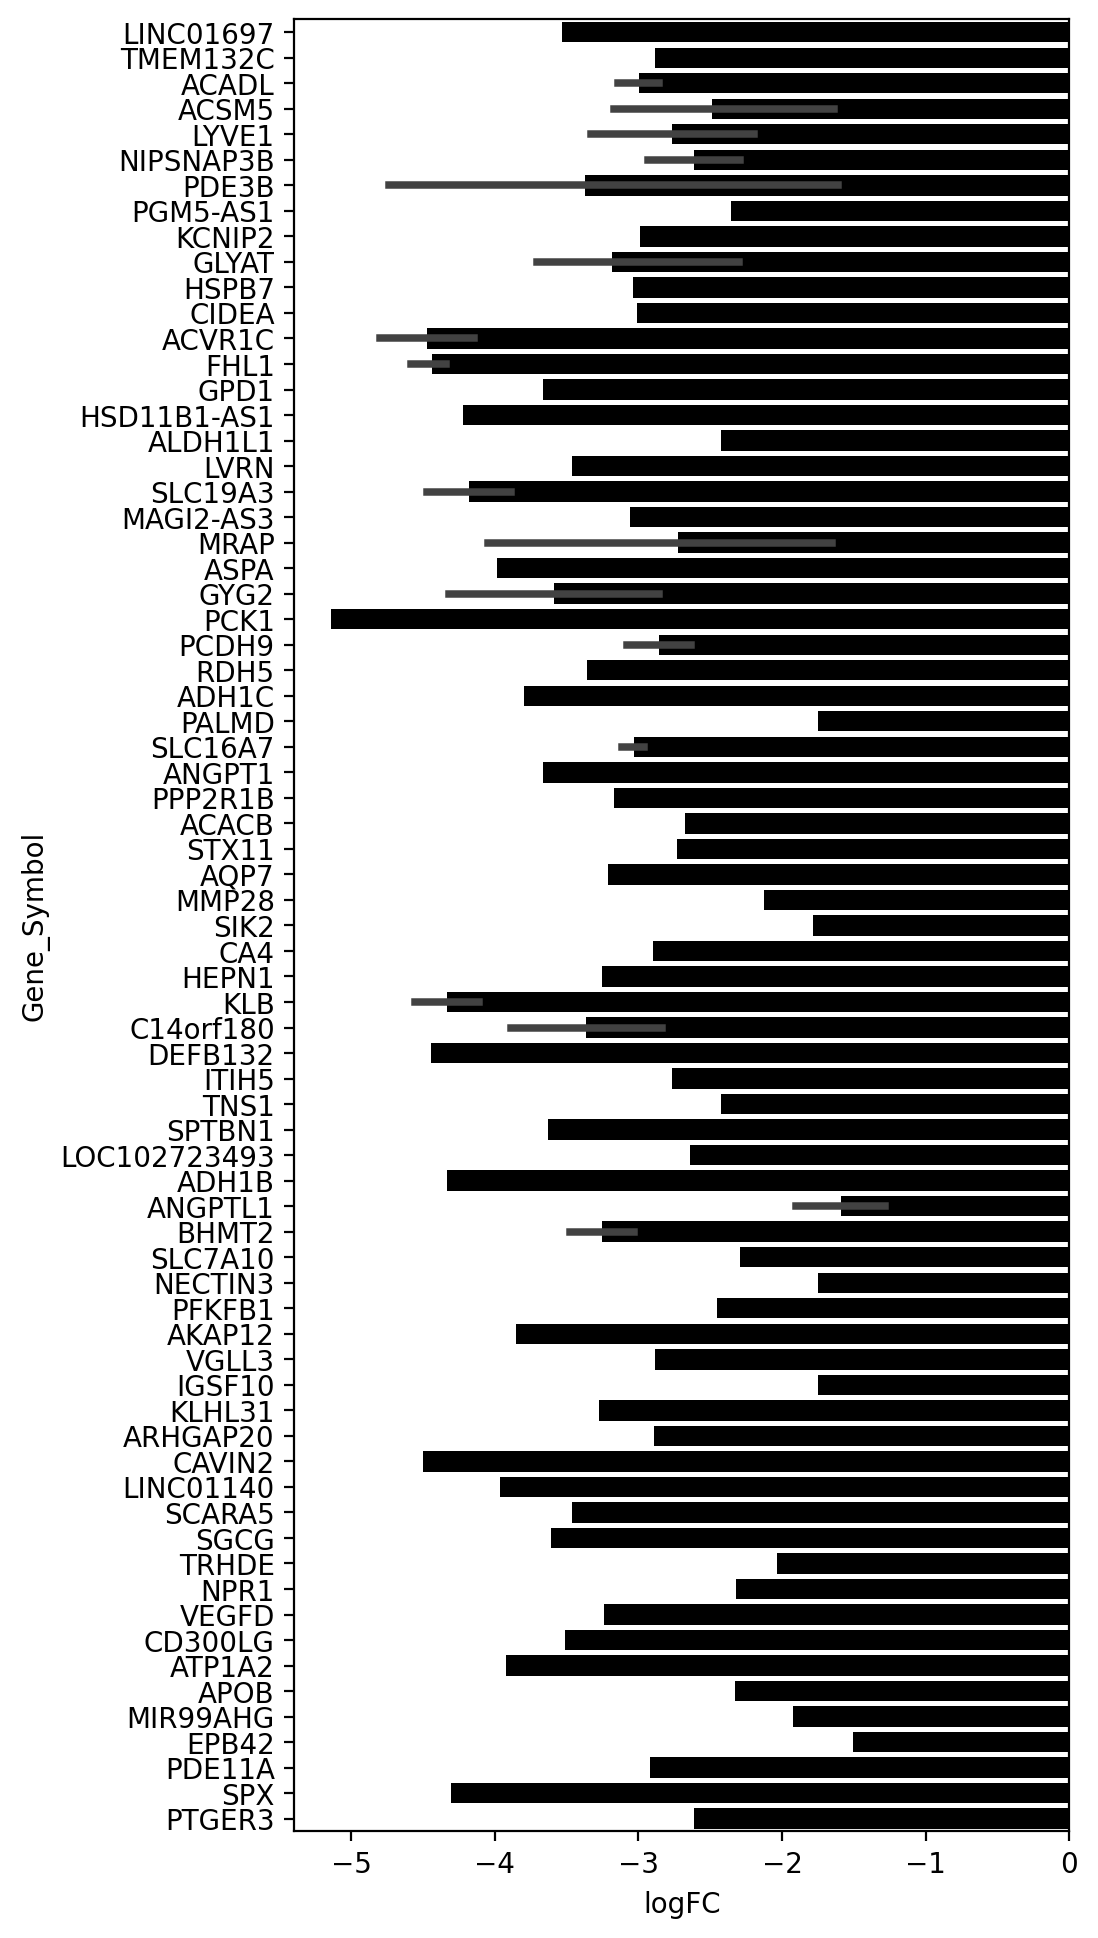

In [18]:
plt.figure(dpi=200, figsize=(5, 12))
sns.barplot(data=limma_df.head(100), y='Gene_Symbol', x='logFC', color='black')

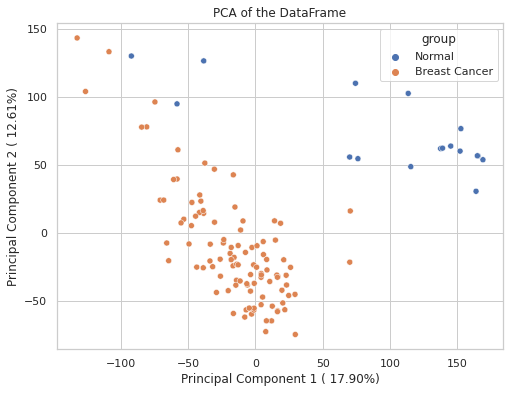

In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(expr_df.iloc[:-1])

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['group'] = typ[:-1]

v1, v2 = pca.explained_variance_ratio_ * 100

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='group', data=pca_df)
plt.title('PCA of the DataFrame')
plt.xlabel(f'Principal Component 1 ({v1: .2f}%)')
plt.ylabel(f'Principal Component 2 ({v2: .2f}%)')
plt.show()


/home/alarsen/.local/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


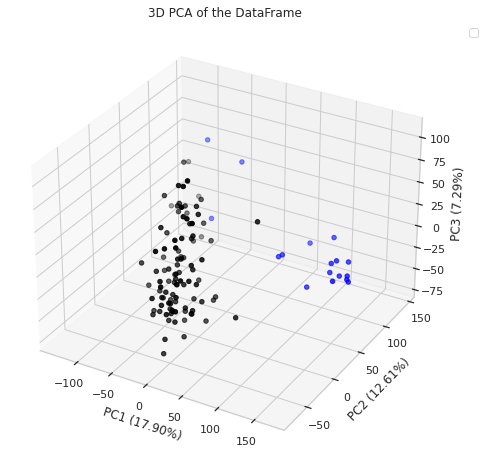

In [32]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
principal_components = pca.fit_transform(expr_df.iloc[:-1])

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['group'] = typ[:-1]

v1, v2, v3 = pca.explained_variance_ratio_ * 100

sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(xs=pca_df['PC1'], ys=pca_df['PC2'], zs=pca_df['PC3'], c=pca_df['group'].map(lambda x: 'blue' if 'Normal' in x else 'black'), depthshade=True)

# Labels and title
ax.set_xlabel(f'PC1 ({v1:.2f}%)')
ax.set_ylabel(f'PC2 ({v2:.2f}%)')
ax.set_zlabel(f'PC3 ({v3:.2f}%)')
plt.title('3D PCA of the DataFrame')

# Legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


In [22]:
%%bash 
wget http://current.geneontology.org/ontology/go-basic.obo

--2024-01-05 13:18:09--  http://current.geneontology.org/ontology/go-basic.obo
Resolving current.geneontology.org (current.geneontology.org)... 2600:9000:24d0:f600:d:ff6c:c780:93a1, 2600:9000:24d0:4e00:d:ff6c:c780:93a1, 2600:9000:24d0:6c00:d:ff6c:c780:93a1, ...
Connecting to current.geneontology.org (current.geneontology.org)|2600:9000:24d0:f600:d:ff6c:c780:93a1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31136976 (30M) [text/obo]
Saving to: ‘go-basic.obo’

     0K .......... .......... .......... .......... ..........  0% 1.54M 19s
    50K .......... .......... .......... .......... ..........  0% 2.66M 15s
   100K .......... .......... .......... .......... ..........  0% 3.72M 13s
   150K .......... .......... .......... .......... ..........  0% 7.16M 11s
   200K .......... .......... .......... .......... ..........  0% 4.56M 10s
   250K .......... .......... .......... .......... ..........  0% 6.01M 9s
   300K .......... .......... .......... .......

In [25]:
%%bash
wget https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz

--2024-01-06 15:03:44--  https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 2607:f220:41e:250::11, 2607:f220:41e:250::7, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|2607:f220:41e:250::11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1009650376 (963M) [application/x-gzip]
Saving to: ‘gene2go.gz.1’

     0K .......... .......... .......... .......... ..........  0%  154K 1h46m
    50K .......... .......... .......... .......... ..........  0% 1.07M 60m50s
   100K .......... .......... .......... .......... ..........  0% 3.93M 41m55s
   150K .......... .......... .......... .......... ..........  0% 4.32M 32m22s
   200K .......... .......... .......... .......... ..........  0% 1.99M 27m30s
   250K .......... .......... .......... .......... ..........  0% 2.70M 23m54s
   300K .......... .......... .......... .......... ..........  0% 7.93M 20m47s
   350K .......... ......

In [26]:
%%bash
gunzip gene2go.gz

In [ ]:
# list of differentially expressed genes
gene_list = limma_df[limma_df['adj.P.Val'] < 1e-10].Gene_Symbol.dropna().to_list()

# Background gene set
background_genes = limma_df.Gene_Symbol.dropna().to_list() # All genes on the array

In [59]:
import mygene
mg = mygene.MyGeneInfo()

gene_query = mg.querymany(set(background_genes), scopes='symbol', fields='entrezgene', species='human')



querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-20962...done.
Finished.
864 input query terms found dup hits:
	[('ZNF29P', 2), ('LINC01127', 2), ('LINC01189', 2), ('OR9A1P', 2), ('LINC01138', 2), ('LINC01346', 2
712 input query terms found no hit:
	['PDZD3', 'WDR63', 'FAM160A2', 'LOC101928278', 'C19orf54', 'LOC100499489', 'YTHDF3-AS1', 'LOC1005065
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [60]:
gene_query[:3]

[{'query': 'CFAP410', '_id': '755', '_score': 17.551607, 'entrezgene': '755'},
 {'query': 'CTRC', '_id': '11330', '_score': 19.00975, 'entrezgene': '11330'},
 {'query': 'THAP10',
  '_id': '56906',
  '_score': 19.59024,
  'entrezgene': '56906'}]

In [52]:
%%bash
awk -F'\t' '$2 == "33" {print}' gene2go

9606	33	GO:0000062	IEA	enables	fatty-acyl-CoA binding	-	Function
9606	33	GO:0001659	ISS	involved_in	temperature homeostasis	-	Process
9606	33	GO:0004466	IBA	enables	long-chain-acyl-CoA dehydrogenase activity	-	Function
9606	33	GO:0004466	ISS	enables	long-chain-acyl-CoA dehydrogenase activity	-	Function
9606	33	GO:0005515	IPI	enables	protein binding	32296183	Function
9606	33	GO:0005737	IBA	is_active_in	cytoplasm	-	Component
9606	33	GO:0005739	IBA	is_active_in	mitochondrion	-	Component
9606	33	GO:0005759	TAS	located_in	mitochondrial matrix	-	Component
9606	33	GO:0016401	IBA	enables	palmitoyl-CoA oxidase activity	-	Function
9606	33	GO:0016401	ISS	enables	palmitoyl-CoA oxidase activity	-	Function
9606	33	GO:0019254	IBA	involved_in	carnitine metabolic process, CoA-linked	-	Process
9606	33	GO:0019254	ISS	involved_in	carnitine metabolic process, CoA-linked	-	Process
9606	33	GO:0031966	IEA	located_in	mitochondrial membrane	-	Component
9606	33	GO:0033539	IBA	involved_in	fatty acid beta-oxidatio

In [70]:
gene_map = {}
for item in gene_query:
    if 'entrezgene' in item:
        q, ent_gene = item['query'], item['entrezgene']
        gene_map[q] = ent_gene

In [85]:
gene_list_entrez = [int(gene_map[i]) for i in gene_list if i in gene_map]

background_genes_entrez = [int(gene_map[i]) for i in background_genes if i in gene_map]

In [86]:
background_genes_entrez[:3]

[284825, 92293, 33]

In [87]:
from goatools import obo_parser
from goatools.go_enrichment import GOEnrichmentStudy
from goatools.anno.genetogo_reader import Gene2GoReader


# Load GO ontology
go_ontology = obo_parser.GODag('go-basic.obo')

# Load gene-to-GO mapping
gene2go = 'gene2go'


gene2go_path = "path/to/gene2go"  # Replace with your file path
gene2go = Gene2GoReader(gene2go, taxids=[9606])  # Assuming human genes with taxid 9606

# Get the gene2go dictionary
ns2assoc = gene2go.get_ns2assc()



go-basic.obo: fmt(1.2) rel(2023-11-15) 46,228 Terms
HMS:0:01:03.907399 345,219 annotations, 20,760 genes, 18,774 GOs, 1 taxids READ: gene2go 


In [88]:
# Run GO enrichment
go_enrichment = GOEnrichmentStudy(
    background_genes_entrez, 
    ns2assoc['BP'], # try biological process
    go_ontology,
    propagate_counts=False,
    alpha=0.05,
    methods=['bonferroni','fdr_bh']
)


Load  Ontology Enrichment Analysis ...
 84% 36,217 of 43,182 population items found in association


In [90]:
enrich_terms = go_enrichment.run_study(gene_list_entrez)


Runing  Ontology Analysis: current study set of 1812 IDs.
 87%  1,114 of  1,277 study items found in association
 70%  1,277 of  1,812 study items found in population(43182)
Calculating 12,181 uncorrected p-values using fisher_scipy_stats
  12,181 terms are associated with 15,820 of 43,182 population items
   4,435 terms are associated with  1,114 of  1,277 study items
  METHOD bonferroni:
      78 GO terms found significant (< 0.05=alpha) ( 78 enriched +   0 purified): local bonferroni
     652 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD fdr_bh:
     387 GO terms found significant (< 0.05=alpha) (387 enriched +   0 purified): statsmodels fdr_bh
     881 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


In [91]:
len(enrich_terms)

12181

In [100]:
go_enrichment.wr_tsv('GO_Enrichment_breast_cancer.tsv', enrich_terms)

  12181 items WROTE: GO_Enrichment_breast_cancer.tsv


In [102]:
go_enriched_df = pd.read_csv('GO_Enrichment_breast_cancer.tsv', sep='\t')

go_enriched_df.head(30)

,# GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_bonferroni,p_fdr_bh,study_items
0,GO:0000122,BP,e,negative regulation of transcription by RNA po...,83/1277,886/43182,3.180357e-20,10,83,3.873993e-16,3.873993e-16,"274, 650, 654, 857, 861, 948, 1028, 1050, 1108..."
1,GO:0045944,BP,e,positive regulation of transcription by RNA po...,94/1277,1157/43182,1.468423e-18,10,94,1.788686e-14,8.943430e-15,"154, 650, 654, 657, 861, 1050, 1052, 1488, 190..."
2,GO:0010628,BP,e,positive regulation of gene expression,51/1277,438/43182,1.085489e-16,8,51,1.322234e-12,4.407447e-13,"71, 284, 287, 338, 650, 654, 657, 857, 947, 94..."
3,GO:0007165,BP,e,signal transduction,83/1277,1066/43182,1.837346e-15,4,83,2.238071e-11,5.047773e-12,"148, 157, 301, 683, 947, 1040, 1389, 1393, 139..."
4,GO:0045892,BP,e,negative regulation of DNA-templated transcrip...,54/1277,521/43182,2.071986e-15,9,54,2.523887e-11,5.047773e-12,"650, 1028, 1050, 1052, 1063, 1108, 1112, 1408,..."
5,GO:0045893,BP,e,positive regulation of DNA-templated transcrip...,59/1277,668/43182,1.266305e-13,9,59,1.542486e-09,2.570809e-10,"650, 861, 999, 1028, 1108, 1389, 1840, 2100, 2..."
6,GO:0043066,BP,e,negative regulation of apoptotic process,45/1277,446/43182,1.154551e-12,6,45,1.406359e-08,2.009084e-09,"284, 301, 580, 665, 835, 847, 983, 1410, 1910,..."
7,GO:0008360,BP,e,regulation of cell shape,23/1277,130/43182,5.570567e-12,6,23,6.785508e-08,8.481885e-09,"301, 1398, 2038, 2039, 2534, 3679, 5064, 5962,..."
8,GO:0008285,BP,e,negative regulation of cell population prolife...,39/1277,374/43182,1.345817e-11,5,39,1.639340e-07,1.801010e-08,"148, 444, 650, 780, 1030, 1031, 1050, 1488, 17..."
9,GO:0032869,BP,e,cellular response to insulin stimulus,19/1277,90/43182,1.524707e-11,8,19,1.857246e-07,1.801010e-08,"2308, 2690, 2822, 3952, 5105, 5140, 5290, 5296..."


{'GO': 'GO:0000122',
 'name': 'negative regulation of transcription by RNA polymerase II',
 'NS': 'BP',
 'depth': 10,
 'method_flds': [NtMethodInfo(source='local', method='bonferroni', fieldname='bonferroni'),
  NtMethodInfo(source='statsmodels', method='fdr_bh', fieldname='fdr_bh')],
 'kws': {'p_uncorrected': 3.1803567619649175e-20,
  'study_items': {274,
   650,
   654,
   857,
   861,
   948,
   1028,
   1050,
   1108,
   1408,
   1488,
   1786,
   1788,
   1910,
   1942,
   2100,
   2146,
   2308,
   2354,
   2625,
   2810,
   2908,
   3204,
   3280,
   3720,
   3725,
   3952,
   4094,
   4286,
   4487,
   4692,
   5138,
   5468,
   5481,
   5494,
   5928,
   6134,
   6256,
   6597,
   6659,
   6913,
   6935,
   7020,
   7227,
   7329,
   7421,
   7430,
   7538,
   7690,
   7704,
   8535,
   8850,
   9079,
   9096,
   9139,
   9314,
   9555,
   9839,
   10127,
   10157,
   10443,
   10848,
   11080,
   11335,
   23286,
   23414,
   23598,
   26155,
   29128,
   51085,
   51222,
   